In [1]:
#%pip install pynput

In [2]:
#%pip install pyautogui

In [6]:
#!pip install pydirectinput

In [1]:
import cv2
import numpy as np
import random
import pydirectinput
import time

# Load reference images
image_paths = [
    "Screenshot 2024-12-16 154156.png" ,
    "Screenshot 2024-12-16 185345.png" ,
   
]
# ref 1 (X) : Screenshot 2024-12-16 154156.png , purple
# ref 2 (Y) : Screenshot 2024-12-16 185345.png , blue 
# ref 3 (Z) : Screenshot 2024-12-16 185500.png , yellow
# ref 4 (V) : Screenshot 2024-12-16 185542.png , red
def process_and_locate(image_paths, screenshot, scales=(0.4,0.45, 0.5,0.55,0.6,0.65 , 0.7 , 0.75 , 0.8 , 0.85 , 0.9 ,0.95 , 1.0)):
    """
    Process the screenshot and locate the position of the game window based on reference images.
    Save the minimum threshold smaller than 0.3 and return its game location.
    """
    
    
    reference_images_data = []
    
    for i, path in enumerate(image_paths, start=1):
        ref_image = cv2.imread(path)
        if ref_image is not None:
            label = f"Game Screen {i}"
            reference_images_data.append({"image": ref_image, "label": label})
        else:
            print(f"Error: Could not load {path}")
    
    gray_screenshot = cv2.cvtColor(screenshot, cv2.COLOR_BGR2GRAY)
    threshold = 0.31
    min_threshold = float('inf')  # Variable to store the smallest threshold
    best_game_location = None  # Variable to store the best game location
    
    for ref in reference_images_data:
        for scale in scales:
            scaled_ref = cv2.resize(ref["image"], None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
            result = cv2.matchTemplate(screenshot, scaled_ref, cv2.TM_SQDIFF_NORMED)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
            print(f"[DEBUG] Match results for {ref['label']}: Min Val={min_val} , Max Val={max_val}, Min Loc={min_loc}")
            
            if min_val < min_threshold and min_val < threshold:  # Check if this is the new minimum
                min_threshold = min_val
                best_game_location = (min_loc[0], min_loc[1], scaled_ref.shape[1], scaled_ref.shape[0])
    
    # If a valid game location was found, return it
    if best_game_location:
        print(f"[DEBUG] Minimum threshold: {min_threshold}")
        return best_game_location
    
    return None


def move_character(direction):
    """
    Simulate key presses to move the character left or right.
    """
    if direction == "left":
        pydirectinput.press('left')  # Simulates pressing the Left Arrow key
        print("Moving Left")
        
    elif direction == "right":
        pydirectinput.press('right')  # Simulates pressing the Right Arrow key
        print("Moving Right")

def auto_play(image_path):
    # Load the provided image
    screenshot = cv2.imread(image_path)
    if screenshot is None:
        print(f"Error: Could not load image at path {image_path}")
        return
    
    last_press_time = time.time()  # Track the time of the last press
    
    
        # Locate the game window
    
    game_location = process_and_locate(image_paths, screenshot)
    
    # If game location is found, extract and display the region
    if game_location:
        x, y, w, h = game_location
        
        # Draw a green rectangle around the matched template
        cv2.rectangle(screenshot, (x, y), (x + w, y + h), (0, 255, 0), 2)
        print(f"Drawing rectangle at: x={x}, y={y}, w={w}, h={h}")
        
        # Display the updated screenshot with the rectangle
        screenshot = cv2.resize(screenshot , (900 , 700))
        cv2.imshow("Game Screen", screenshot)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        # Check if it's time to press a key
        current_time = time.time()
        # if current_time - last_press_time >= 0.5:  # 0.5-second delay
        #     direction = random.choice(["left", "right"])
        #     move_character(direction)
        #     last_press_time = current_time  # Reset the timer
    else:
        print("Game window not found!")
    
    
    # Exit the loop if 'q' is pressed
    
        


# Main function to run the auto-play feature
if __name__ == "__main__":
    # Replace this with the path of the image you want to use
    image_path = "C:\\Users\\mayar\\Pictures\\Screenshots\\test_size7.png"
    #Screenshot 2024-12-25 175835.png V
    #Screenshot 2024-12-25 175914.png V 
    #Screenshot 2024-12-25 175856.png X Y Z V size
    #Screenshot 2024-12-25 175931.png X Y Z V
    #Screenshot 2024-12-25 175944.png X Y Z V
    
    # sized photos
    #size1 min val = 4
    #size2 min val = 4.8
    #size3 min val = 1.9
    #size4 min val = 3.2
    #size5 min val = 1.8 
    # tested sized photos
    #test_size1
    #test_size2
    #test_size3
    #test_size7 habaed

    
    """_summary_ there is a problem in red color refrence and there is a problem in size the first and second screen its give me a match but a low match 
    so the color is problem 
    """
    auto_play(image_path)


Error: Could not load image at path C:\Users\mayar\Pictures\Screenshots\test_size7.png


In [ ]:
import cv2

# Load the image in color mode
path = 'C:\\Users\\mayar\\Pictures\\Screenshots\\Screenshot 2024-12-25 175957.png'
image = cv2.imread(path)

# Convert the image to grayscale to determine threshold
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary threshold
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Apply the binary image as a mask on the original image
masked_image = cv2.bitwise_and(image, image, mask=binary_image)

# Convert the masked image to grayscale
final_gray_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)

# Display the result (for testing purposes)
final_gray_image = cv2.resize(final_gray_image , (1100 , 700))
cv2.imshow("Binary Threshold + Grayscale", final_gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('C:\\Users\\mayar\\Pictures\\Screenshots\\color12.png')  # Replace with your image path
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Extract the Hue channel
hue_channel = hsv[:, :, 0]

# Calculate the histogram of the Hue channel
hist = cv2.calcHist([hue_channel], [0], None, [180], [0, 180])

# Find the most frequent Hue value
most_frequent_hue = np.argmax(hist)

# Define a range around the most frequent hue (e.g., for crimson, adjust if needed)
hue_range =160  # Range around the most frequent hue
lower_bound = np.array([most_frequent_hue - hue_range, 50, 50])  # Adjust saturation and value as needed
upper_bound = np.array([most_frequent_hue + hue_range, 255, 255])

# Create a mask for the target color
mask = cv2.inRange(hsv, lower_bound, upper_bound)

# Replace the target color with white
result = img.copy()
result[mask > 0] = [255, 255, 255]  # Set to white in BGR

# Display the results
cv2.imshow("Original Image", img)
cv2.imshow("Masked Image", mask)
cv2.imshow("Result Image", result)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('C:\\Users\\mayar\\Pictures\\Screenshots\\color12.png')  # Replace with your image path
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

# Calculate histograms for each channel
colors = ('r', 'g', 'b')  # Color names
for i, color in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.title('Color Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('C:\\Users\\mayar\\Pictures\\Screenshots\\color12.png')  # Replace 'image.jpg' with your image path

# Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Extract the H, S, and V channels
h, s, v = cv2.split(hsv)

# Reduce the Value (V) channel
reduction_amount = 35  # Adjust this value to control brightness reduction
v = np.clip(v - reduction_amount, 0, 255)  # Ensure values remain in [0, 255]

# Merge the channels back
hsv_reduced = cv2.merge([h, s, v])

# Convert back to BGR
img_reduced_brightness = cv2.cvtColor(hsv_reduced, cv2.COLOR_HSV2BGR)

# Display the result
cv2.imshow('Original Image', img)
cv2.imshow('Reduced Brightness', img_reduced_brightness)
cv2.waitKey(0)
cv2.destroyAllWindows()


# *the code* 

In [3]:
import cv2
import numpy as np
import random
import pydirectinput
import mss
import time
from pynput import keyboard
import matplotlib.pyplot as plt



In [4]:
def process_and_locate(image_paths, screenshot, scales=(0.4,0.45, 0.5,0.55,0.6,0.65 , 0.7 , 0.75 , 0.8 , 0.85 , 0.9 ,0.95 , 1.0)):
    """
    Process the screenshot and locate the position of the game window based on reference images.
    Save the minimum threshold smaller than 0.3 and return its game location.
    """
    
    
    reference_images_data = []
    
    for i, path in enumerate(image_paths, start=1):
        ref_image = cv2.imread(path)
        if ref_image is not None:
            label = f"Game Screen {i}"
            reference_images_data.append({"image": ref_image, "label": label})
        else:
            print(f"Error: Could not load {path}")
    
    gray_screenshot = cv2.cvtColor(screenshot, cv2.COLOR_BGR2GRAY)
    threshold = 0.31
    min_threshold = float('inf')  # Variable to store the smallest threshold
    best_game_location = None  # Variable to store the best game location
    
    for ref in reference_images_data:
        for scale in scales:
            scaled_ref = cv2.resize(ref["image"], None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
            result = cv2.matchTemplate(screenshot, scaled_ref, cv2.TM_SQDIFF_NORMED)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
            print(f"[DEBUG] Match results for {ref['label']}: Min Val={min_val} , Max Val={max_val}, Min Loc={min_loc}")
            
            if min_val < min_threshold and min_val < threshold:  # Check if this is the new minimum
                min_threshold = min_val
                best_game_location = (min_loc[0], min_loc[1], scaled_ref.shape[1], scaled_ref.shape[0])
    
    # If a valid game location was found, return it
    if best_game_location:
        print(f"[DEBUG] Minimum threshold: {min_threshold}")
        return best_game_location
    
    return None

In [5]:
def move_character(direction):
    """
    Simulate key presses to move the character left or right.
    """
    if direction == "left":
       # pydirectinput.press('left')  # Simulates pressing the Left Arrow key
        print("Moving Left")
        
    elif direction == "right":
      #  pydirectinput.press('right')  # Simulates pressing the Right Arrow key
        print("Moving Right")

In [6]:
LEFT_ROI = None
RIGHT_ROI = None
CENTER_ROI = None

def locate_player_and_define_rois(frame_left, character_template):
    """
    Locate the player in the given frame using template matching and define three ROIs:
    - Left ROI: Based on the character's location.
    - Right ROI: Shifted to the right by 2.5 * template_width from the Left ROI.
    - Center ROI: Shifted further to the right by 2.5 * template_width.

    Parameters:
        frame_left (np.ndarray): The input frame where the character is on the left.
        character_template (np.ndarray): The template image of the character.

    Returns:
        None: Updates the global variables LEFT_ROI, RIGHT_ROI, CENTER_ROI.
    """
    global LEFT_ROI, RIGHT_ROI, CENTER_ROI

    def get_roi(frame, template_gray):
        # Convert frame to grayscale
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Get dimensions of the template
        template_height, template_width = template_gray.shape
        extra_height = 1.2 * template_height
        adjusted_height = int(template_height + extra_height)

        # Perform template matching
        result = cv2.matchTemplate(frame_gray, template_gray, cv2.TM_CCOEFF_NORMED)
        _, _, _, top_left = cv2.minMaxLoc(result)

        # Define the ROI
        x = top_left[0]
        y = max(0, top_left[1] - int(extra_height))
        w = template_width
        h = adjusted_height
        return (x, y, w, h), template_width, template_height

    # Convert template to grayscale
    template_gray = cv2.cvtColor(character_template, cv2.COLOR_BGR2GRAY)

    # Get the Left ROI
    LEFT_ROI, template_width, template_height = get_roi(frame_left, template_gray)
   # print(f"Left ROI Coordinates: x={LEFT_ROI[0]}, y={LEFT_ROI[1]}, w={LEFT_ROI[2]}, h={LEFT_ROI[3]}")

    # Get the Right ROI by shifting from the Left ROI
    right_x = LEFT_ROI[0] + int(2.7 * template_width)
    right_y = LEFT_ROI[1]
    right_w = template_width
    right_h = LEFT_ROI[3]
    RIGHT_ROI = (right_x, right_y, right_w, right_h)
  #  print(f"Right ROI Coordinates: x={RIGHT_ROI[0]}, y={RIGHT_ROI[1]}, w={RIGHT_ROI[2]}, h={RIGHT_ROI[3]}")

    # Get the Center ROI by further shifting from the Left ROI
    center_x = LEFT_ROI[0]
    center_y = LEFT_ROI[1]
    center_w = int(template_width * 3.5) 
    center_h = template_height
    CENTER_ROI = (center_x, center_y, center_w, center_h)
   # print(f"Center ROI Coordinates: x={CENTER_ROI[0]}, y={CENTER_ROI[1]}, w={CENTER_ROI[2]}, h={CENTER_ROI[3]}")


In [43]:
character_template = cv2.imread("player.png")
frame_left = cv2.imread("Screenshot 2024-12-16 185500.png")

In [50]:
import cv2
import numpy as np

def detect_branches(mask):
    """
    Detect branches using the given mask and return their locations.
    
    Parameters:
        mask (np.ndarray): Binary mask highlighting the tree trunk and branches.

    Returns:
        bool: True if branches are found, False otherwise.
        list: A list of branch lines, each represented as (x1, y1, x2, y2).
    """
    # Apply Gaussian Blur to reduce noise
    blurred_mask = cv2.GaussianBlur(mask, (5, 5), 0)
    
    # Edge detection using Canny
    edges = cv2.Canny(blurred_mask, 100, 150)
    
    # Detect horizontal lines using Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=30, maxLineGap=10)
    
    branches = []
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            if abs(y2 - y1) < 10:  # Only keep horizontal lines
                branches.append((x1, y1, x2, y2))
    
    # Print the detected branches
    if branches:
        print(f"Branches Detected: {branches}")
        return True, branches
    else:
        print("No branches detected.")
        return False, []

def detect_branches_in_roi_hough(frame, roi_coords):
    """
    Detect branches in the ROI of the frame using Hough Lines.

    Parameters:
        frame (np.ndarray): The input frame where branches will be detected.
        roi_coords (tuple): Coordinates of the ROI as (x, y, w, h).

    Returns:
        bool: True if branches are found, False otherwise.
    """
    # Extract ROI from the frame
    x, y, w, h = roi_coords
    roi = frame[y:y + h, x:x + w]

    # Convert ROI to grayscale
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding
    _, roi_thresh = cv2.threshold(roi_gray, 70, 255, cv2.THRESH_BINARY_INV)

    # Refine the mask using morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    roi_refined = cv2.morphologyEx(roi_thresh, cv2.MORPH_CLOSE, kernel)

    # Detect branches using the Hough Line-based function
    return detect_branches(roi_refined)

In [51]:
frame = cv2.imread("Screenshot 2024-12-29 163213.png")

In [52]:

locate_player_and_define_rois(frame, character_template)
# Detect branches
has_branches_left,  left_branches = detect_branches_in_roi_hough(frame, LEFT_ROI)
has_branches_right, right_branches = detect_branches_in_roi_hough(frame, RIGHT_ROI)
has_branches_center, center_branches = detect_branches_in_roi_hough(frame, CENTER_ROI)
# Output result
if has_branches_left:
    print("Branches found on the LEFT ROI!")
else:
    print("No branches found on the LEFT ROI!")

if has_branches_right:
    print("Branches found on the RIGHT ROI!")
else:
    print("No branches found on the RIGHT ROI!")

if has_branches_center:
    print("Branches found on the CENTER ROI!")
else:
    print("No branches found on the CENTER ROI!")


Left ROI Coordinates: x=172, y=383, w=53, h=182
Right ROI Coordinates: x=315, y=383, w=53, h=182
Center ROI Coordinates: x=172, y=383, w=185, h=83
Branches Detected: [(0, 64, 52, 64)]
No branches detected.
Branches Detected: [(0, 64, 78, 64), (40, 51, 78, 52)]
Branches found on the LEFT ROI!
No branches found on the RIGHT ROI!
Branches found on the CENTER ROI!


Left ROI Coordinates: x=172, y=383, w=53, h=182
Right ROI Coordinates: x=315, y=383, w=53, h=182
Center ROI Coordinates: x=172, y=383, w=185, h=83


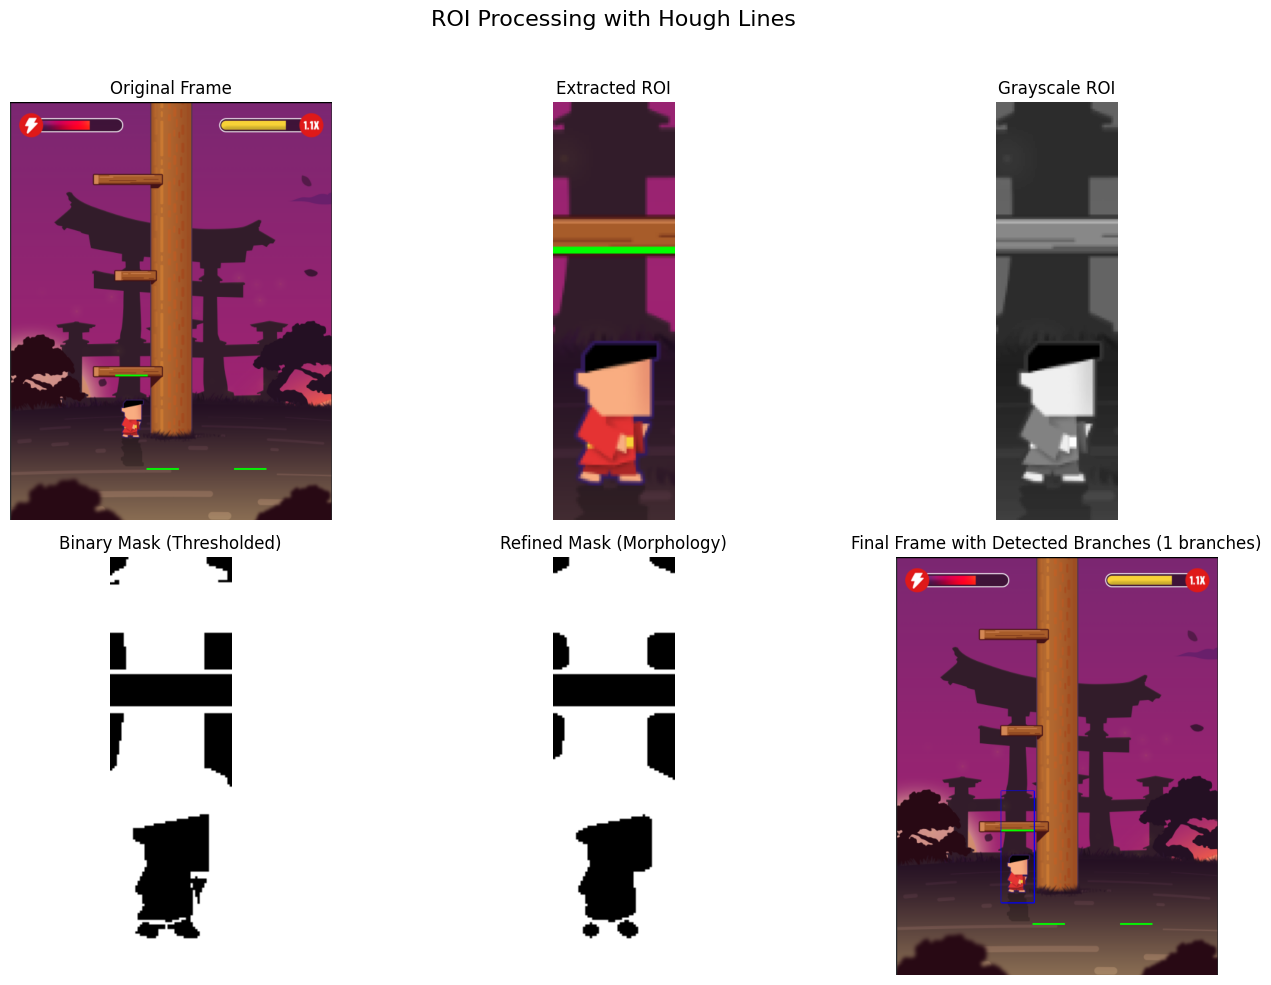

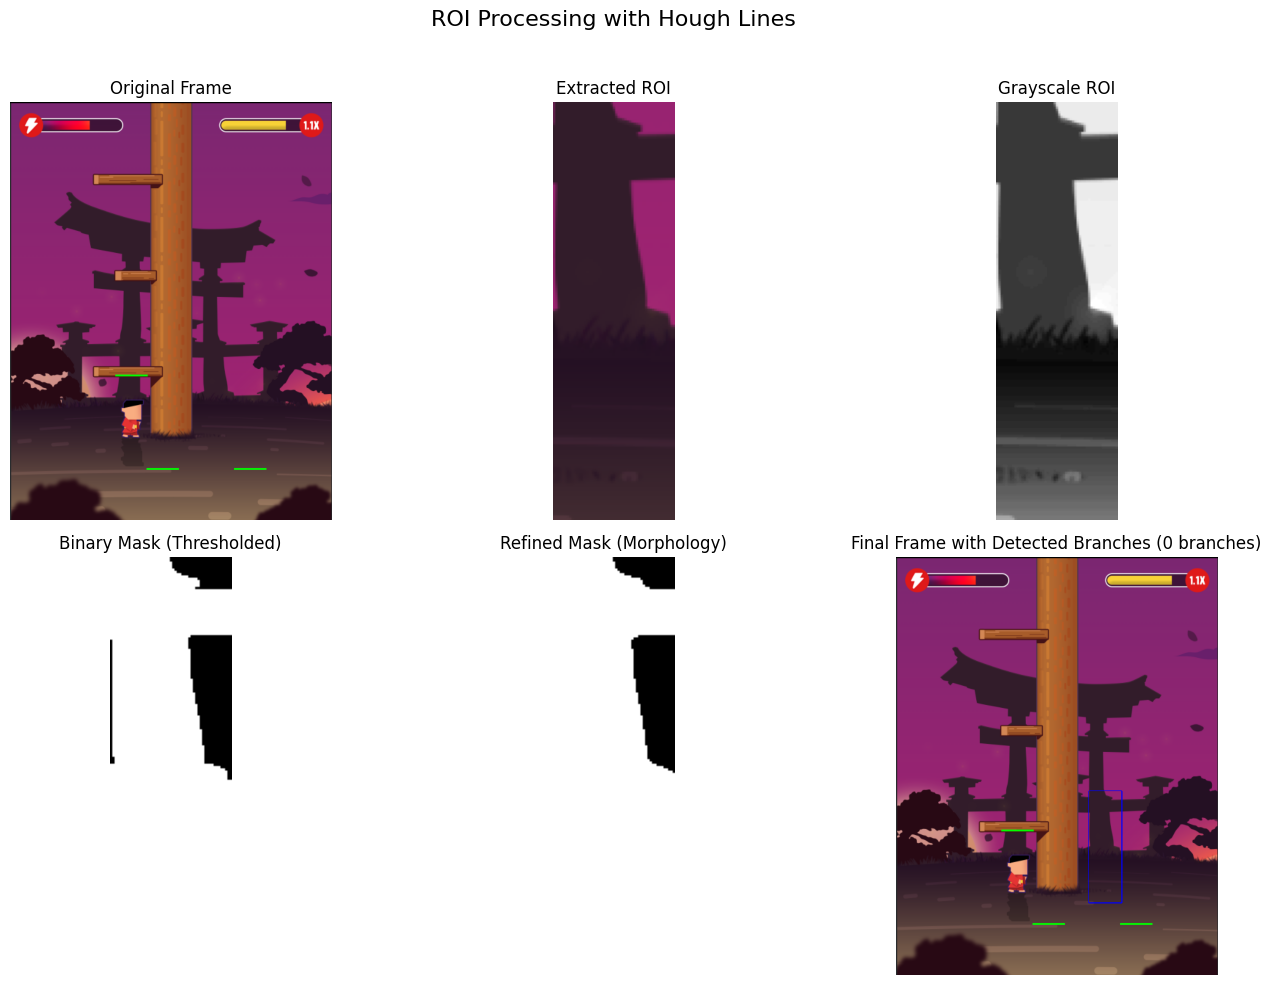

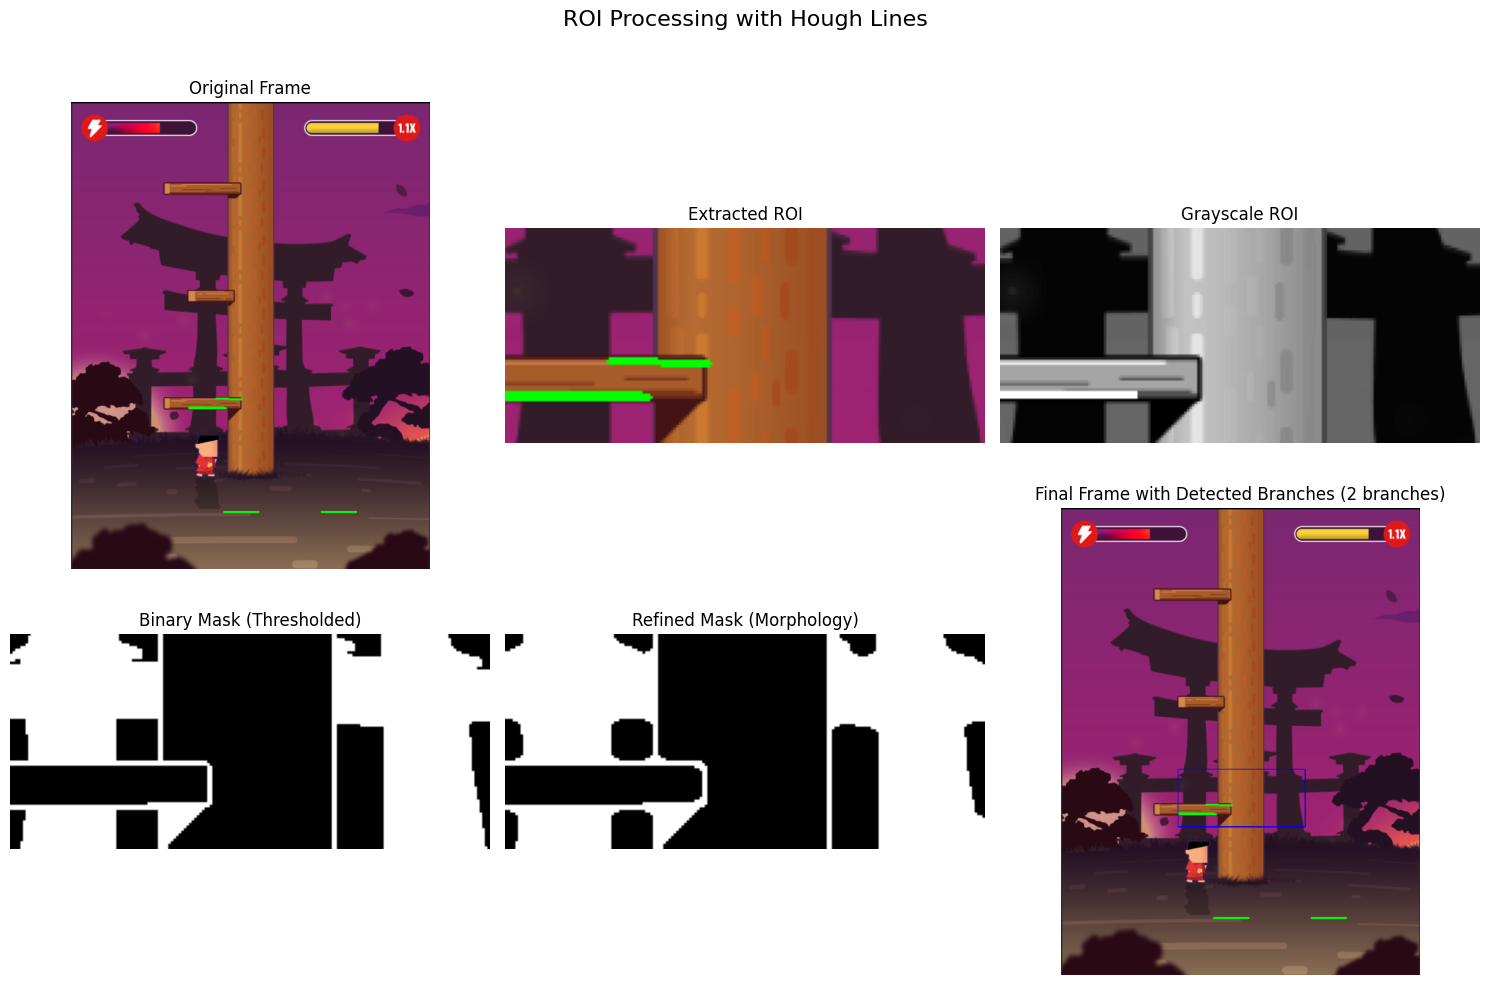

Detected Branches in the LEFT ROI (Bounding Boxes):
(0, 64, 52, 64)
Detected Branches in the RIGHT ROI (Bounding Boxes):
Detected Branches in the CENTER ROI (Bounding Boxes):
(0, 65, 55, 65)
(40, 51, 78, 52)


In [49]:
# Detect branches and visualize processing steps
locate_player_and_define_rois(frame, character_template)
frame_with_branches, left_branches = detect_branches_in_roi_hough(frame, LEFT_ROI)
frame_with_branches, right_branches = detect_branches_in_roi_hough(frame, RIGHT_ROI)
frame_with_branches, center_branches = detect_branches_in_roi_hough(frame, CENTER_ROI)

# Print detected branches for debugging
print("Detected Branches in the LEFT ROI (Bounding Boxes):")
for branch in left_branches:
    print(branch)

print("Detected Branches in the RIGHT ROI (Bounding Boxes):")
for branch in right_branches:
    print(branch)

print("Detected Branches in the CENTER ROI (Bounding Boxes):")
for branch in center_branches:
    print(branch)

Left ROI Coordinates: x=223, y=513, w=53, h=182
Right ROI Coordinates: x=366, y=513, w=53, h=182
Center ROI Coordinates: x=223, y=513, w=185, h=83
Branches detected in ROI: (223, 513, 53, 182)
True
Branches detected in ROI: (366, 513, 53, 182)
True
Branches detected in ROI: (223, 513, 185, 83)
True


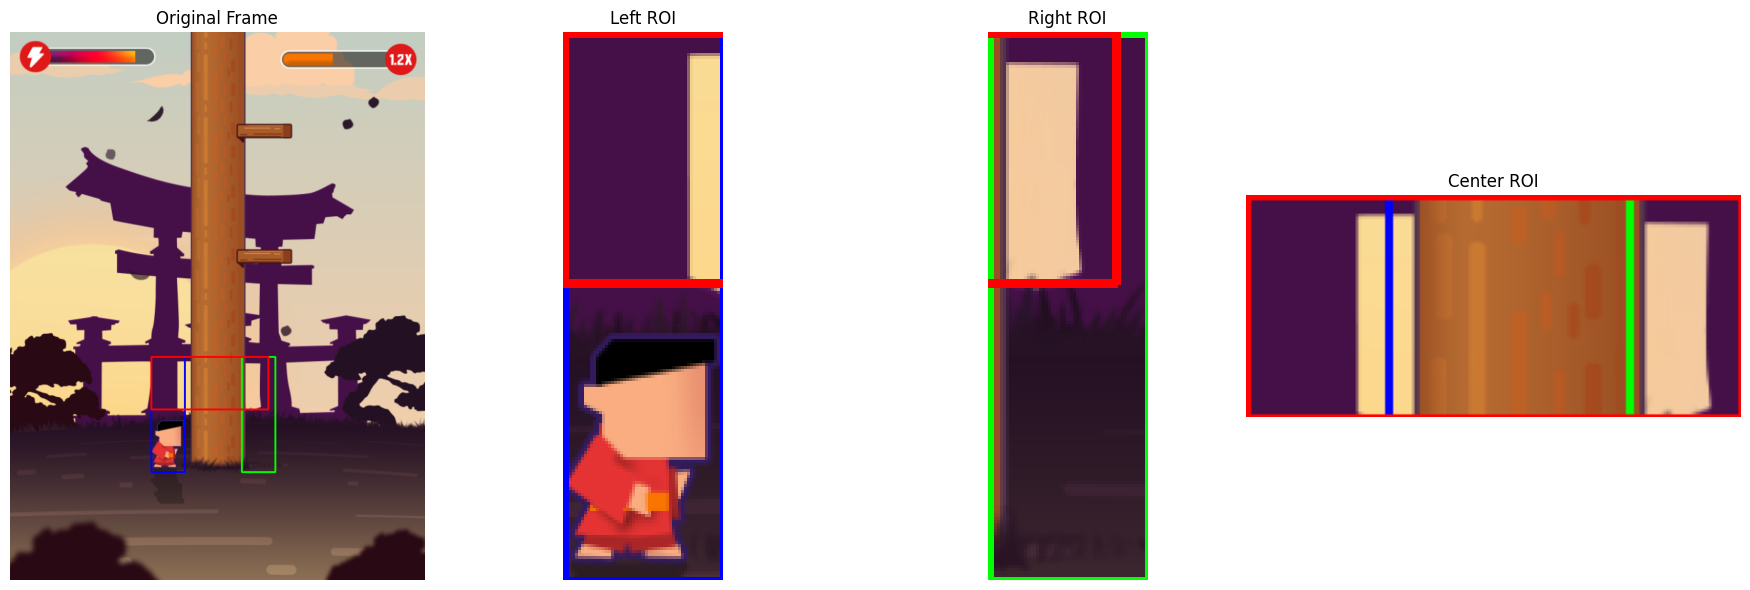

In [44]:
locate_player_and_define_rois(frame_left, character_template)
img = cv2.imread("Screenshot 2024-12-16 185500.png")
frame = img.copy()
x1 , y1 , w1 , h1 = LEFT_ROI
x2 , y2 , w2 , h2 = RIGHT_ROI
x3 , y3 , w3 , h3 = CENTER_ROI

roi_region_left = img[y1:y1 + h1, x1:x1 + w1]
roi_region_right = img[y2:y2 + h2, x2:x2 + w2]
roi_region_center = img[y3:y3 + h3, x3:x3 + w3]

print(detect_branches_in_roi_hough(frame,LEFT_ROI))
print(detect_branches_in_roi_hough(frame,RIGHT_ROI))
print(detect_branches_in_roi_hough(frame,CENTER_ROI))

    # Draw left ROI
x, y, w, h = LEFT_ROI
cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Draw right ROI
x, y, w, h = RIGHT_ROI
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Draw center ROI on the left frame
x, y, w, h = CENTER_ROI
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
    # Visualization
fig, ax = plt.subplots(1, 4, figsize=(18, 6))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Frame")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(roi_region_left, cv2.COLOR_BGR2RGB))
ax[1].set_title("Left ROI")
ax[1].axis("off")

ax[2].imshow(cv2.cvtColor(roi_region_right, cv2.COLOR_BGR2RGB))
ax[2].set_title("Right ROI")
ax[2].axis("off")

ax[3].imshow(cv2.cvtColor(roi_region_center, cv2.COLOR_BGR2RGB))
ax[3].set_title("Center ROI")
ax[3].axis("off")

plt.tight_layout()
plt.show()

In [34]:
def game_loop(frame):
    """
    Main game loop to move the character and detect branches.
    The game always starts with the character on the left.

    Parameters:
        frame (np.ndarray): The input frame where branch detection is performed.
    """
    global LEFT_ROI, RIGHT_ROI

    # Start by moving the character to the left
    move_character("left")
    searching_in_left = True  # Start with searching in the left ROI

    while True:
        if searching_in_left:
            if detect_branches_in_roi_hough(frame, LEFT_ROI):
                move_character("right")
                searching_in_left = False  # Switch to searching in the right ROI
        else:
            if detect_branches_in_roi_hough(frame, RIGHT_ROI):
                move_character("left")
                searching_in_left = True  # Switch to searching in the left ROI

In [40]:
def apply_binary_mask (img):
    # Convert to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hue_channel = hsv[:, :, 0]  # Extract the Hue channel

    # Normalize the Hue values to the full range [0, 255]
    hue_normalized = cv2.normalize(hue_channel, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    cv2.imshow('hue_normalize' , hue_normalized)
    cv2.waitKey(0)
    # # Remove yellow regions
    # lower_yellow = np.array([20, 100, 100])
    # upper_yellow = np.array([30, 255, 255])
    # yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    # Threshold the black areas in the Hue channel
    _, black_mask = cv2.threshold(hue_normalized, 19, 255, cv2.THRESH_BINARY_INV)

    # Refine the mask with morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13, 13))
    black_mask_refined = cv2.morphologyEx(black_mask, cv2.MORPH_OPEN, kernel)  # Remove small noise
    black_mask_refined = cv2.morphologyEx(black_mask_refined, cv2.MORPH_CLOSE, kernel)  # Fill small gaps

    # Apply Gaussian Blur to smooth the edges
    black_mask_smooth = cv2.GaussianBlur(black_mask_refined, (5, 5), 0)
    return black_mask_smooth


In [14]:
image_paths = [
    "Screenshot 2024-12-16 154156.png" ,
]

In [35]:
player_temp = cv2.imread('player.png')

In [18]:
character_template_test = cv2.imread("C://Users//shaym//Downloads//character_template.png")

In [28]:
# not used 

def reduce_image_brightness_preserve_black(img, reduction_factor=0.4):
    """
    Reduces the brightness of an image by scaling the Value (V) channel in HSV,
    preserving dark tones and avoiding white overexposure.

    Parameters:
        img (numpy.ndarray): The input image in BGR format.
        reduction_factor (float): The scaling factor for brightness (0 < reduction_factor <= 1).
                                  A value closer to 1 reduces brightness less.
        
    Returns:
        numpy.ndarray: The resulting image with reduced brightness.
    """
    # Convert the image to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Extract the H, S, and V channels
    h, s, v = cv2.split(hsv)
    
    # Scale the Value (V) channel while maintaining the dark tones
    v = (v * reduction_factor).astype(np.uint8)  # Scale and cast back to uint8
    
    # Merge the channels back
    hsv_reduced = cv2.merge([h, s, v])
    
    # Convert back to BGR
    img_reduced_brightness = cv2.cvtColor(hsv_reduced, cv2.COLOR_HSV2BGR)
    
    return img_reduced_brightness


 ### next cell for test only , without mss real time

In [41]:
path = 'C:\\Users\\mayar\\Pictures\\Screenshots\\color5.png'
#color1.png 1-> 20
#level 1 problem 2 ,  
#level 2 problem 6 , 
#level 3 problem 4 , 5 , 8 , 12 , 19 
#NOTE : 1- sun is bad , 2- moon is good
#NOTE : dark is good , red is bad , 
img = cv2.imread(path)
img = cv2.resize(img , (616 , 813))
img = reduce_image_brightness_preserve_black(img)
cv2.imshow('0' , img)
cv2.waitKey(0)
img , croods = locate_player_and_define_roi(img , player_temp )
cv2.imshow('1' , img)
cv2.waitKey(0)
mx = apply_binary_mask(img)
cv2.imshow('m' , mx)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
def capture_screenshot(monitor):
    with mss.mss() as sct:
        screenshot = np.array(sct.grab(monitor))
        return cv2.cvtColor(screenshot, cv2.COLOR_BGRA2BGR)


def on_press(key):
    global game_location
    try:
        if key.char == 'r':  
            print("[INFO] 'R' key pressed. Searching for the game window...")
            game_location = None  # Reset the game location
    except AttributeError:
        pass

# Main function for game processing
def stream_game_region():
    global monitor, running, game_location
    global LEFT_ROI, RIGHT_ROI, CENTER_ROI 

    while running:
        # Capture a screenshot
        screenshot = capture_screenshot(monitor)
        
        if game_location is None:
            # Attempt to locate the game window
            game_location = process_and_locate(image_paths, screenshot)
            game_is_running = False
        
        if game_location:
            x, y, w, h = game_location

            # Extract and stream the game region
            game_region = screenshot[y:y + h, x:x + w]
            game_region = cv2.resize(game_region , (616 , 813))
            
            locate_player_and_define_rois(game_region, player_temp)
            if all(roi is not None for roi in [LEFT_ROI, RIGHT_ROI, CENTER_ROI]):
                x1 , y1 , w1 , h1 = LEFT_ROI
                x2 , y2 , w2 , h2 = RIGHT_ROI
                x3 , y3 , w3 , h3 = CENTER_ROI
                roi_region_left = game_region[y1:y1 + h1, x1:x1 + w1]
                roi_region_right = game_region[y2:y2 + h2, x2:x2 + w2]
                roi_region_center = game_region[y3:y3 + h3, x3:x3 + w3]
            
                if not game_is_running :
                    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

                    ax[0].imshow(cv2.cvtColor(roi_region_left, cv2.COLOR_BGR2RGB))
                    ax[0].set_title("Left ROI")
                    ax[0].axis("off")

                    ax[1].imshow(cv2.cvtColor(roi_region_right, cv2.COLOR_BGR2RGB))
                    ax[1].set_title("Right ROI")
                    ax[1].axis("off")


                    ax[2].imshow(cv2.cvtColor(roi_region_center, cv2.COLOR_BGR2RGB))
                    ax[2].set_title("Center ROI")
                    ax[2].axis("off")

                    plt.tight_layout()
                    plt.show()
                   
                    game_is_running = True
                #game_loop(game_region)
                cv2.imshow("Game Screen", game_region)
                cv2.waitKey(0)
                cv2.destroyAllWindows()
                
        else:
            # Display black screen with "Game Not Found" text
            black_screen = np.zeros((700, 900, 3), dtype=np.uint8)
            cv2.putText(black_screen, "Game Not Found", (250, 350), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 3)
            cv2.imshow("Game Screen", black_screen)

        # Check for key press to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            print("[INFO] 'Q' key pressed. Exiting...")
            running = False
            break



### *main cell*

[INFO] Press 'R' to locate the game window.
[INFO] Press 'Q' to quit the script.
[DEBUG] Match results for Game Screen 1: Min Val=1.0 , Max Val=1.0, Min Loc=(0, 0)
[DEBUG] Match results for Game Screen 1: Min Val=1.0 , Max Val=1.0, Min Loc=(0, 0)
[DEBUG] Match results for Game Screen 1: Min Val=1.0 , Max Val=1.0, Min Loc=(0, 0)
[DEBUG] Match results for Game Screen 1: Min Val=1.0 , Max Val=1.0, Min Loc=(0, 0)
[DEBUG] Match results for Game Screen 1: Min Val=1.0 , Max Val=1.0, Min Loc=(0, 0)
[DEBUG] Match results for Game Screen 1: Min Val=1.0 , Max Val=1.0, Min Loc=(0, 0)
[DEBUG] Match results for Game Screen 1: Min Val=1.0 , Max Val=1.0, Min Loc=(0, 0)
[DEBUG] Match results for Game Screen 1: Min Val=1.0 , Max Val=1.0, Min Loc=(0, 0)
[DEBUG] Match results for Game Screen 1: Min Val=1.0 , Max Val=1.0, Min Loc=(0, 0)
[DEBUG] Match results for Game Screen 1: Min Val=1.0 , Max Val=1.0, Min Loc=(0, 0)
[DEBUG] Match results for Game Screen 1: Min Val=1.0 , Max Val=1.0, Min Loc=(0, 0)
[DEBUG

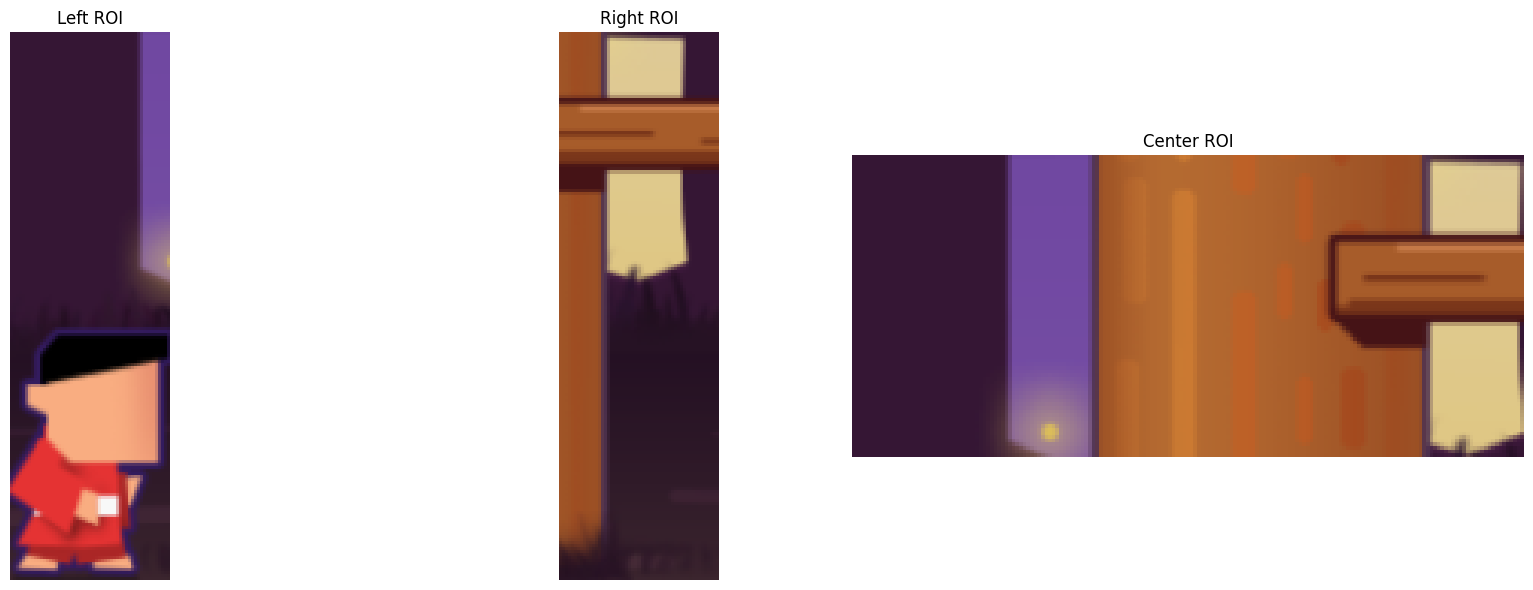

Left ROI Coordinates: x=189, y=491, w=53, h=182
Right ROI Coordinates: x=332, y=491, w=53, h=182
Center ROI Coordinates: x=189, y=491, w=185, h=83
[INFO] 'R' key pressed. Searching for the game window...
[INFO] 'R' key pressed. Searching for the game window...
[DEBUG] Match results for Game Screen 1: Min Val=0.28135427832603455 , Max Val=1.0, Min Loc=(488, 353)
[DEBUG] Match results for Game Screen 1: Min Val=0.26655343174934387 , Max Val=1.0, Min Loc=(429, 703)
[DEBUG] Match results for Game Screen 1: Min Val=0.2577999234199524 , Max Val=1.0, Min Loc=(418, 684)
[DEBUG] Match results for Game Screen 1: Min Val=0.262628436088562 , Max Val=1.0, Min Loc=(405, 661)
[DEBUG] Match results for Game Screen 1: Min Val=0.2681107819080353 , Max Val=1.0, Min Loc=(395, 630)
[DEBUG] Match results for Game Screen 1: Min Val=0.2693263590335846 , Max Val=1.0, Min Loc=(362, 513)
[DEBUG] Match results for Game Screen 1: Min Val=0.25534069538116455 , Max Val=1.0, Min Loc=(347, 492)
[DEBUG] Match results f

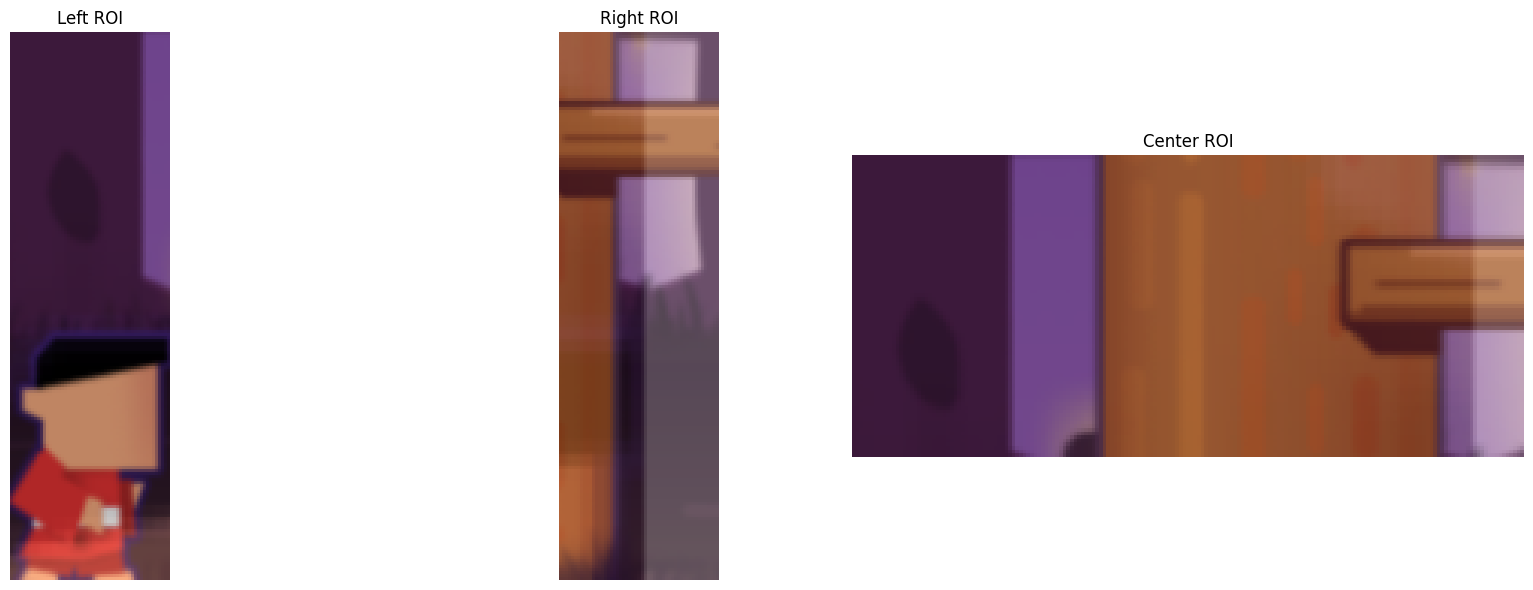

Left ROI Coordinates: x=120, y=11, w=53, h=182
Right ROI Coordinates: x=263, y=11, w=53, h=182
Center ROI Coordinates: x=120, y=11, w=185, h=83
Left ROI Coordinates: x=123, y=0, w=53, h=182
Right ROI Coordinates: x=266, y=0, w=53, h=182
Center ROI Coordinates: x=123, y=0, w=185, h=83
Left ROI Coordinates: x=389, y=14, w=53, h=182
Right ROI Coordinates: x=532, y=14, w=53, h=182
Center ROI Coordinates: x=389, y=14, w=185, h=83
Left ROI Coordinates: x=118, y=13, w=53, h=182
Right ROI Coordinates: x=261, y=13, w=53, h=182
Center ROI Coordinates: x=118, y=13, w=185, h=83
Left ROI Coordinates: x=118, y=13, w=53, h=182
Right ROI Coordinates: x=261, y=13, w=53, h=182
Center ROI Coordinates: x=118, y=13, w=185, h=83
Left ROI Coordinates: x=118, y=13, w=53, h=182
Right ROI Coordinates: x=261, y=13, w=53, h=182
Center ROI Coordinates: x=118, y=13, w=185, h=83
Left ROI Coordinates: x=118, y=13, w=53, h=182
Right ROI Coordinates: x=261, y=13, w=53, h=182
Center ROI Coordinates: x=118, y=13, w=185, 

In [37]:
with mss.mss() as sct:
    monitor = sct.monitors[1]  # Use the primary monitor

# Reference images for matching

# Initialize global variables
game_location = None
running = True

# Start keyboard listener
listener = keyboard.Listener(on_press=on_press)
listener.start()

print("[INFO] Press 'R' to locate the game window.")
print("[INFO] Press 'Q' to quit the script.")

# Start streaming the game region
try:
    stream_game_region()
except KeyboardInterrupt:
    print("[INFO] Script interrupted.")
finally:
    # Cleanup resources
    cv2.destroyAllWindows()
    listener.stop()
    print("[INFO] Script terminated.")